<a href="https://colab.research.google.com/github/WinuWijegunawardhana98/Integrated-Healthcare-Management-System-for-Vulnerable-Populations/blob/Sandaruwan/Heart_Disease_Prediction_using_a_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Import Data Set

In [3]:
# Read the dataset from the CSV file
df = pd.read_csv('/content/heartdataset (1).csv')
# Check for any missing (null) values in the dataset
df.isnull().sum()
# Display the entire dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Data Preprocessing and Analysing

In [4]:
# number of rows and columns in the dataset
df.shape

(1025, 14)

In [5]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Extracting the feature columns (first 13 columns) from the DataFrame
X = df.iloc[:, :13]
# Extracting the target column (14th column, index 13) from the DataFrame
Y = df.iloc[:, 13]
# Converting the feature DataFrame (X) into a numpy array
X = np.array(X)
# Converting the target Series (Y) into a numpy array
Y = np.array(Y)
# Display the feature matrix (X) to check its structure
X


array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [7]:
# Display the target variable array (Y) to inspect its structure and ensure it was correctly processed
Y


array([0, 0, 0, ..., 0, 1, 0])

Decision Tree Classifier with Different Hyperparameters

In [8]:
#Initialize and Fit Decision Tree Classifier (with entropy criterion and max depth of 6, random splitter)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter="random")
tree.fit(X, Y)

# Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=700, height=350)

# Predict and evaluate accuracy
predict=tree.predict(X)
predict
print('accuracy is',metrics.accuracy_score(Y,predict))

accuracy is 0.904390243902439


In [9]:
#Initialize and Fit Decision Tree Classifier (with entropy criterion and max depth of 6, best splitter)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best')
tree.fit(X, Y)

# Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=700, height=350)

# Predict and evaluate accuracy
predict = tree.predict(X)
print('Accuracy is', metrics.accuracy_score(Y, predict))

Accuracy is 0.9609756097560975


In [10]:
#Decision Tree with minimum samples to split as 2
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best', min_samples_split=2)
tree.fit(X, Y)

# Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=700, height=350)

# Predict and evaluate accuracy
predict = tree.predict(X)
print('Accuracy is', metrics.accuracy_score(Y, predict))

Accuracy is 0.9609756097560975


In [11]:
#Decision Tree with max features as 'log2'
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='best', min_samples_split=2, max_features='log2')
tree.fit(X, Y)

# Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=700, height=350)

# Predict and evaluate accuracy
predict = tree.predict(X)
print('Accuracy is', metrics.accuracy_score(Y, predict))

Accuracy is 0.9551219512195122


In [12]:
#Decision Tree with max features as 'sqrt'
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='best', min_samples_split=2, max_features='sqrt')
tree.fit(X, Y)

# Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=700, height=350)

# Predict and evaluate accuracy
predict = tree.predict(X)
print('Accuracy is', metrics.accuracy_score(Y, predict))


Accuracy is 0.9326829268292683


In [13]:
#Decision Tree with different criterion ('gini') and other parameters
tree = DecisionTreeClassifier(criterion='gini', max_depth=8, splitter='best', min_samples_split=3, min_samples_leaf=1)
tree.fit(X, Y)

# Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=700, height=350)

# Predict and evaluate accuracy
predict = tree.predict(X)
print('Accuracy is', metrics.accuracy_score(Y, predict))

Accuracy is 0.9921951219512195


In [14]:
#Decision Tree with class weights as 'balanced' to handle class imbalance
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='best', min_samples_split=2, random_state=30, class_weight='balanced')
tree.fit(X, Y)

# Visualize the Decision Tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=700, height=350)

# Predict and evaluate accuracy
predict = tree.predict(X)
print('Accuracy is', metrics.accuracy_score(Y, predict))

Accuracy is 0.9960975609756098


Splitting Data into Training and Testing Datasets

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # Ensure this line is included
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Main Heading: Splitting Data into Training and Testing Datasets
# This section splits the dataset into training and testing datasets, with 10% data for testing.

# Define target variable and features
y = df['target'].to_numpy()  # Target variable (Heart Disease outcome)
x = df.iloc[:, 0:13].to_numpy()  # Features (Heart Disease related attributes)

# Print the target variable
print(y)

# Split the data into training (90%) and testing (10%) datasets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

# Main Heading: Implementing K-Nearest Neighbors (KNN) for Heart Disease Prediction
# This section applies the KNN algorithm for heart disease prediction and evaluates accuracy for different k values.

clusters = []  # List to store different values of k (number of neighbors)
accuracy = []  # List to store accuracy scores for different k values

# Loop through different k values (from 1 to 9) to evaluate the performance of KNN
for i in range(1, 10):
    knnmodel = KNeighborsClassifier(n_neighbors=i)  # Initialize KNN model with current k value
    knnmodel.fit(xtrain, ytrain)  # Fit the model on the training data
    ypred = knnmodel.predict(xtest)  # Predict the heart disease outcome on the test data
    clusters.append(i)  # Append current k value to clusters list
    accuracy.append(metrics.accuracy_score(ytest, ypred))  # Append accuracy score to accuracy list

# Print the clusters (k values) and corresponding accuracy scores
print(clusters)
print(accuracy)


[0 0 0 ... 0 1 0]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1.0, 1.0, 1.0, 0.8932038834951457, 0.8155339805825242, 0.7766990291262136, 0.7475728155339806, 0.7475728155339806, 0.7475728155339806]


Data Preparation for Heart Disease Prediction

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.09,random_state=1)
print(xtrain.shape)
print(ytrain.shape)

(932, 13)
(932,)


In [17]:
# Train the Categorical Naive Bayes (CNB) model
cnb = CategoricalNB()
cnb.fit(xtrain, ytrain)  # Fit the model on training data

# Make predictions on the test data
ypredict = cnb.predict(xtest)
print(ypredict)  # Print the predicted values

# Print the number of test samples
print(xtest.shape[0])

# Print the predicted and actual values for comparison
print(ypredict)
print(ytest)

# Check how many predictions are incorrect
count = np.all(ytest != ypredict)
print(count)

# Print the accuracy of the model
print("accuracy score:", metrics.accuracy_score(ytest, ypredict))

# Print the confusion matrix to evaluate the model's performance
print("confusion matrix:\n", metrics.confusion_matrix(ytest, ypredict))


[0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1]
93
[0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1]
[0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1
 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1]
False
accuracy score: 0.9139784946236559
confusion matrix:
 [[41  7]
 [ 1 44]]


In [18]:
#Implementing XGBoost for Heart Disease Prediction

# Import necessary libraries
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set random seed and test size for train-test split
seed = 5
test_size = 0.1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Initialize the XGBoost model with specified parameters
model = XGBClassifier(max_depth=6, gamma=7, n_estimators=500, subsample=0.5, colsample_bytree=0.6, nthread=2, learning_rate=0.8, eval_metric='merror', objective='binary:logistic')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Round the predictions to 0 or 1 (binary outcomes)
predictions = [round(value) for value in y_pred]

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 94.17%


In [19]:
#Heart Disease Prediction Using XGBoost

# Define random seed and test size for train-test splitting
seed = 5
test_size = 0.1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Initialize the XGBoost model with custom parameters
model = XGBClassifier(
    max_depth=11,       # Maximum depth of the trees
    gamma=11,           # Minimum loss reduction for a split
    n_estimators=1000,  # Number of trees in the ensemble
    subsample=0.9,      # Fraction of samples for each tree
    nthread=2,          # Number of threads to use
    learning_rate=0.8,  # Step size shrinkage
    eval_metric='mlogloss',  # Metric to evaluate during training
    objective='binary:logistic'  # Binary classification objective
)

# Train the XGBoost model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Convert predictions to a list for easier analysis
predictions = [value for value in y_pred]

# Calculate and print the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 91.26%


In [20]:
#Heart Disease Prediction Using XGBoost (Optimized Parameters)

# Define test size for splitting the data
test_size = 0.1

# Split data into training and testing sets (10% for testing, random state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=34)

# Initialize the XGBoost classifier with tuned parameters
model = XGBClassifier(
    learning_rate=0.3,          # Step size shrinkage
    n_estimators=100,           # Number of trees in the ensemble
    objective='binary:logistic',# Binary classification objective
    booster='gbtree',           # Use gradient-boosted trees
    min_child_weight=1,         # Minimum sum of weights for child nodes
    max_depth=6,                # Maximum tree depth
    gamma=0,                    # Minimum loss reduction for splits
    subsample=1,                # Fraction of samples for training each tree
    colsample_bytree=1,         # Fraction of features for each tree
    reg_lambda=1,               # L2 regularization term
    reg_alpha=0,                # L1 regularization term
    eval_metric='rmse'          # Metric for evaluation
)

# Train the model on the training dataset
model.fit(X_train, y_train)

# Predict the outcomes for the test dataset
y_pred = model.predict(X_test)

# Convert predictions to rounded values (binary output)
predictions = [round(value) for value in y_pred]

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(accuracy)  # Print accuracy as a decimal
print("Accuracy: %.2f%%" % (accuracy * 100.0))  # Print accuracy as a percentage


1.0
Accuracy: 100.00%


Logistic Regression Model for Heart Disease Prediction

In [21]:
#Logistic Regression Model for Heart Disease Prediction

# Importing the Logistic Regression model
regress = linear_model.LogisticRegression()

# Convert the dataset to a NumPy array for processing
df1 = df.values
print(df1)  # Display the dataset as a NumPy array

# Separate features (xtrain) and target labels (ytrain)
xtrain = df1[:, :13]  # Extract the first 13 columns as features
xtrain = xtrain.astype('int')  # Ensure features are integers
ytrain = df1[:, 13]  # Extract the 14th column as target
ytrain = ytrain.astype('int')  # Ensure target labels are integers

# Print the shapes of features and target arrays
print(xtrain.shape)  # Shape of the features array
print(ytrain.shape)  # Shape of the target array

# Normalize the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
xtrain = MinMaxScaler().fit_transform(xtrain)
print(xtrain)  # Display the normalized features

# Train the Logistic Regression model on the dataset
regress.fit(xtrain, ytrain)

# Print the coefficients and intercept of the logistic regression model
print("coeff:", regress.coef_)  # Coefficients for each feature
print("intercepts:", regress.intercept_)  # Model intercept

# Predict outcomes using the trained model
ypredicted = regress.predict(xtrain)

# Compare the predicted and actual target values
for i in range(0, len(xtrain)):
    print(ytrain[i], ypredicted[i])

# Evaluate the model's performance using metrics
from sklearn import metrics
print("accuracy:", metrics.accuracy_score(ytrain, ypredicted))  # Calculate accuracy
print("confusion-matrix:\n", metrics.confusion_matrix(ytrain, ypredicted))  # Confusion matrix


[[52.  1.  0. ...  2.  3.  0.]
 [53.  1.  0. ...  0.  3.  0.]
 [70.  1.  0. ...  0.  3.  0.]
 ...
 [47.  1.  0. ...  1.  2.  0.]
 [50.  0.  0. ...  0.  2.  1.]
 [54.  1.  0. ...  1.  3.  0.]]
(1025, 13)
(1025,)
[[0.47916667 1.         0.         ... 1.         0.5        1.        ]
 [0.5        1.         0.         ... 0.         0.         1.        ]
 [0.85416667 1.         0.         ... 0.         0.         1.        ]
 ...
 [0.375      1.         0.         ... 0.5        0.25       0.66666667]
 [0.4375     0.         0.         ... 1.         0.         0.66666667]
 [0.52083333 1.         0.         ... 0.5        0.25       1.        ]]
coeff: [[-7.33108961e-01 -1.60075660e+00  2.15978613e+00 -1.31783868e+00
  -1.38651736e+00 -2.45262974e-03  7.36055738e-01  2.14410796e+00
  -1.04867892e+00 -2.55388448e+00  1.22591583e+00 -2.55815651e+00
  -2.15714028e+00]]
intercepts: [2.12851932]
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
1 0
1 1

Support Vector Machine (SVM) for Heart Disease Prediction

In [22]:
#Support Vector Machine (SVM) for Heart Disease Prediction

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size=0.9, random_state=42)  # Split the data with 90% for testing

# Extract features and target values for training and testing
X_train = training_set.iloc[:, 0:13].values  # Features for training
Y_train = training_set.iloc[:, 13].values  # Target for training
X_test = test_set.iloc[:, 0:13].values  # Features for testing
Y_test = test_set.iloc[:, 13].values  # Target for testing

# Import and configure the Support Vector Classifier (SVC)
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid', verbose=True, decision_function_shape='ovo')  # SVM with sigmoid kernel and 'one-vs-one' strategy

# Train the SVM classifier on the training data
classifier.fit(X_train, Y_train)

# Predict the outcomes using the testing data
Y_pred = classifier.predict(X_test)

# Evaluate the performance using a confusion matrix and calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)  # Compute the confusion matrix
accuracy = float(cm.diagonal().sum()) / len(Y_test)  # Calculate accuracy based on the confusion matrix

# Print the accuracy of the model
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


[LibSVM]
Accuracy Of SVM For The Given Dataset :  0.5135427952329361


In [23]:
#Support Vector Machine (SVM) with Linear Kernel for Heart Disease Prediction

# Importing the necessary module for dataset splitting
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (10%) and testing (90%) sets
training_set, test_set = train_test_split(df, test_size=0.9, random_state=42)

# Extracting feature values (columns 0-12) and target values (column 13) for training and testing
X_train = training_set.iloc[:, 0:13].values  # Features for training
Y_train = training_set.iloc[:, 13].values  # Target for training
X_test = test_set.iloc[:, 0:13].values  # Features for testing
Y_test = test_set.iloc[:, 13].values  # Target for testing

# Importing and configuring the SVM classifier with a linear kernel
from sklearn.svm import SVC
classifier = SVC(
    kernel='linear',  # Using a linear kernel
    random_state=42,  # Setting the random state for reproducibility
    verbose=True,  # Enabling verbose output for detailed logs during training
    decision_function_shape='ovr',  # Using 'one-vs-rest' strategy for decision function
    break_ties=True  # Enable breaking ties if needed during predictions
)

# Training the SVM model using the training data
classifier.fit(X_train, Y_train)

# Predicting the outcomes for the test set using the trained SVM model
Y_pred = classifier.predict(X_test)

# Importing the confusion matrix function to evaluate the model
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix to compare actual vs predicted values
cm = confusion_matrix(Y_test, Y_pred)

# Calculating accuracy based on the confusion matrix
accuracy = float(cm.diagonal().sum()) / len(Y_test)

# Printing the calculated accuracy of the SVM model
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)



[LibSVM]
Accuracy Of SVM For The Given Dataset :  0.8104008667388949


In [24]:
#Implementing Support Vector Machine (SVM) with Linear Kernel for Heart Disease Prediction

# Importing the train_test_split function for splitting the dataset
from sklearn.model_selection import train_test_split

# Extracting the target variable (y) and features (x) from the dataset
y = df['target'].to_numpy()  # Target variable as a numpy array
x = df.iloc[:, 0:13].to_numpy()  # Features as a numpy array (columns 0-12)

# Splitting the dataset into training (90%) and testing (10%) sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

# Importing and configuring the SVM classifier
from sklearn.svm import SVC
classifier = SVC(
    kernel='linear',  # Using a linear kernel
    verbose=True,  # Enabling verbose output for training process
    decision_function_shape='ovr'  # One-vs-Rest strategy for decision function
)

# Training the SVM classifier on the training dataset
classifier.fit(xtrain, ytrain)

# Predicting the test set outcomes using the trained model
Y_pred = classifier.predict(xtest)

# Importing the confusion matrix function for evaluation
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix to compare actual vs predicted outcomes
cm = confusion_matrix(ytest, Y_pred)

# Calculating the accuracy using the confusion matrix
accuracy = float(cm.diagonal().sum()) / len(ytest)  # Accuracy = Correct Predictions / Total Predictions
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

# Calculating accuracy using the accuracy_score function
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(Y_pred, ytest)
print(Accuracy)


[LibSVM]
Accuracy Of SVM For The Given Dataset :  0.9029126213592233
0.9029126213592233


In [25]:
#Heart Disease Prediction using SVM with Linear Kernel

# Importing train_test_split for dataset splitting
from sklearn.model_selection import train_test_split

# Extracting the target variable (y) and feature variables (x) from the dataset
y = df['target'].to_numpy()  # Target variable as a numpy array
x = df.iloc[:, 0:13].to_numpy()  # Features (first 13 columns) as a numpy array

# Splitting the dataset into training (91%) and testing (9%) sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.09)

# Importing and setting up the SVM classifier
from sklearn.svm import SVC
classifier = SVC(
    kernel='linear',  # Using a linear kernel
    verbose=True,  # Enables verbose output for the training process
    decision_function_shape='ovr'  # One-vs-Rest decision function strategy
)

# Training the SVM classifier on the training dataset
classifier.fit(xtrain, ytrain)

# Making predictions on the test dataset
Y_pred = classifier.predict(xtest)

# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix to evaluate the model's performance
cm = confusion_matrix(ytest, Y_pred)

# Calculating accuracy manually using the confusion matrix
accuracy = float(cm.diagonal().sum()) / len(ytest)  # Correct predictions / Total predictions
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

# Calculating accuracy using accuracy_score for comparison
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(Y_pred, ytest)
print(Accuracy)


[LibSVM]
Accuracy Of SVM For The Given Dataset :  0.8279569892473119
0.8279569892473119


In [26]:
#Checking Skewness of Dataset Features
# Calculating the skewness of each column in the DataFrame
df.skew()


,0
age,-0.248866
sex,-0.851449
cp,0.529455
trestbps,0.739768
chol,1.074073
fbs,1.971339
restecg,0.180440
thalach,-0.513777
exang,0.692655
oldpeak,1.210899


In [27]:
# Kurtosis of Dataset Features
# Calculating the kurtosis of each column in the DataFrame
df.kurtosis()


,0
age,-0.525618
sex,-1.277531
cp,-1.149500
trestbps,0.991221
chol,3.996803
fbs,1.889859
restecg,-1.309614
thalach,-0.088822
exang,-1.523205
oldpeak,1.314471


Visualizing Feature Correlations with a Heatmap

<Axes: >

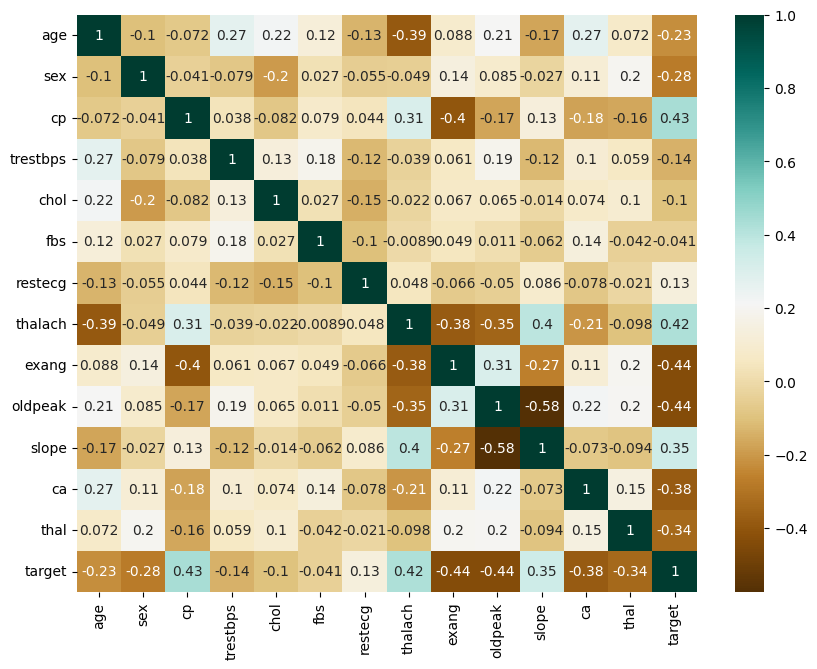

In [28]:
#Visualizing Feature Correlations with a Heatmap
# Creating a heatmap to display correlations between dataset features
plt.figure(figsize=(10,7.5))  # Setting the figure size for better visibility
sb.heatmap(df.corr(), annot=True, cmap='BrBG')  # Generating a heatmap with annotations and a color palette


In [29]:
#Splitting the Dataset into Features and Target Variables
# Extracting the feature columns (all columns except the last one) and converting them to numpy arrays
x = df.iloc[:,:-1].values  # Features (X) - all rows, all columns except the last
y = df.iloc[:,-1].values   # Target variable (Y) - last column (usually the label or outcome)
# Printing the features (x) and target (y) variables
x
y


array([0, 0, 0, ..., 0, 1, 0])

In [30]:
from collections import Counter
# Counting the frequency of each class in the target variable 'y'
# Counter is used to create a dictionary-like object that counts the occurrences of each value in 'y'
counter_before = Counter(y)
# Printing the frequency of each class in the target variable
print(counter_before)



Counter({1: 526, 0: 499})


In [31]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance
# SMOTE generates synthetic samples for the minority class to balance the class distribution
oversample = SMOTE()

# Using fit_resample to generate synthetic samples and resample the dataset
x, y = oversample.fit_resample(x, y)

# Counting the frequency of each class in the target variable 'y' after resampling
# Counter is used to check the new class distribution
counter_after = Counter(y)

# Printing the frequency of each class in the target variable after applying SMOTE
print(counter_after)


Counter({0: 526, 1: 526})


In [32]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# 30% of the data will be used for testing and 70% for training
# 'random_state' ensures reproducibility of the split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Printing the shape (size) of the training and testing datasets for both features (x) and target (y)
print('size of X_train:', x_train.shape)
print('size of X_test:', x_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)


size of X_train: (736, 13)
size of X_test: (316, 13)
size of y_train: (736,)
size of y_test: (316,)


In [33]:
# Importing Required Libraries for Building Convolutional Neural Network (CNN) Model

from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import tensorflow as tf



In [34]:
# Reshaping the Training and Testing Data for Input into the CNN Model
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)  # Reshaping x_train to have 3 dimensions (samples, features, channels)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)  # Reshaping x_test to have 3 dimensions (samples, features, channels)


In [35]:
# Printing the shapes of the reshaped X_train and X_test datasets
print("X Train shape: ", x_train.shape)  # Displaying the shape of the training data after reshaping
print("X Test shape: ", x_test.shape)  # Displaying the shape of the testing data after reshaping


X Train shape:  (736, 13, 1)
X Test shape:  (316, 13, 1)


Building the Convolutional Neural Network (CNN) Model

In [36]:
# Initializing the Sequential model
cnn_model = tf.keras.models.Sequential()

# Adding the first Conv1D layer with 32 filters, LeakyReLU activation, and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (x_train.shape[1],1)))

# Adding the second Conv1D layer with 64 filters and LeakyReLU activation
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

# Adding the third Conv1D layer with 128 filters and LeakyReLU activation
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

# Adding MaxPooling layer to reduce spatial dimensions
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))

# Adding Dropout to prevent overfitting
cnn_model.add(Dropout(0.5))

# Flattening the output to pass to the Dense layers
cnn_model.add(Flatten())

# Adding the first Dense layer with 256 units and LeakyReLU activation
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

# Adding the second Dense layer with 512 units and LeakyReLU activation
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

# Adding the final output layer with 10 units (for classification) and softmax activation
cnn_model.add(Dense(units = 10, activation='softmax'))

# Compiling the model with Adam optimizer and sparse categorical crossentropy loss function
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#Displaying the summary of the CNN model to check the architecture and parameters
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 13, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 13, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 13, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         229,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,386 (1.52 MB)

 Trainable params: 397,386 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

Training the CNN Model with the training data and validating with the test data

In [38]:
#Training the CNN Model with the training data and validating with the test data
cnn_model_history = cnn_model.fit(x_train, y_train, epochs=15, batch_size=10, validation_data=(x_test, y_test))


Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4643 - loss: 4.3264 - val_accuracy: 0.5348 - val_loss: 0.6917
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5828 - loss: 0.7054 - val_accuracy: 0.6329 - val_loss: 0.6444
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5880 - loss: 0.7099 - val_accuracy: 0.5823 - val_loss: 0.6446
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6420 - loss: 0.6521 - val_accuracy: 0.5316 - val_loss: 0.7193
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6735 - loss: 0.6246 - val_accuracy: 0.6044 - val_loss: 0.6591
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7320 - loss: 0.5303 - val_accuracy: 0.7437 - val_loss: 0.4952
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7547 - loss: 0.4940 - val_accuracy: 0.8006 - val_loss: 0.4317
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7240 - loss: 0.5484 - val_accuracy: 0.8228 - val_

Text(0, 0.5, 'Accuracy')

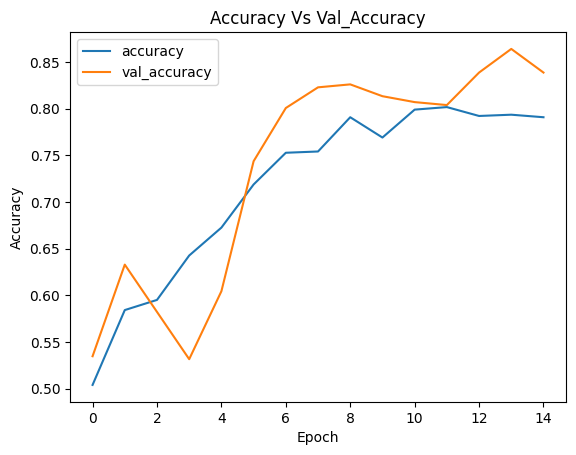

In [39]:
# Plotting the accuracy and validation accuracy over the epochs
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')  # Title for the plot
plt.xlabel('Epoch')  # Label for the x-axis (Epochs)
plt.ylabel('Accuracy')  # Label for the y-axis (Accuracy)


In [40]:
# Printing the maximum training accuracy achieved during the training process
print(max(cnn_model_history.history['accuracy']))


0.801630437374115


Testing


In [43]:
import numpy as np
import tensorflow as tf

# Sample input data: (Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope)
input_data = [63, 1, 3, 145, 233, 1, 2, 150, 0, 2.3, 3, 1, 0]  # Example of 13 features

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance (needs to be 3D for CNN)
input_data_reshaped = input_data_as_numpy_array.reshape(1, input_data_as_numpy_array.shape[0], 1)

# Predict using the trained CNN model
prediction = cnn_model.predict(input_data_reshaped)

# Output the result
if prediction[0][0] < prediction[0][1]:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The Person has Heart Disease


In [44]:
import numpy as np
import tensorflow as tf

# Sample input data: (Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope)
input_data = [59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]  # Example of 13 features

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance (needs to be 3D for CNN)
input_data_reshaped = input_data_as_numpy_array.reshape(1, input_data_as_numpy_array.shape[0], 1)

# Predict using the trained CNN model
prediction = cnn_model.predict(input_data_reshaped)

# Output the result
if prediction[0][0] < prediction[0][1]:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Person does not have a Heart Disease


In [45]:
import numpy as np
import tensorflow as tf

# Sample input data: (Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope)
input_data = [50, 0, 0, 110, 254, 0, 0, 159, 0, 0.0, 2, 0, 2]  # Example of 13 features

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance (needs to be 3D for CNN)
input_data_reshaped = input_data_as_numpy_array.reshape(1, input_data_as_numpy_array.shape[0], 1)

# Predict using the trained CNN model
prediction = cnn_model.predict(input_data_reshaped)

# Output the result
if prediction[0][0] < prediction[0][1]:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
The Person does not have a Heart Disease


In [46]:
import numpy as np
import tensorflow as tf

# Sample input data: (Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope)
input_data = [59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]  # Example of 13 features

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance (needs to be 3D for CNN)
input_data_reshaped = input_data_as_numpy_array.reshape(1, input_data_as_numpy_array.shape[0], 1)

# Predict using the trained CNN model
prediction = cnn_model.predict(input_data_reshaped)

# Output the result
if prediction[0][0] < prediction[0][1]:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The Person does not have a Heart Disease


In [47]:
import numpy as np
import tensorflow as tf

# Sample input data: (Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope)
input_data = [63, 1, 3, 145, 233, 1, 2, 150, 0, 2.3, 3, 1, 0]  # Example of 13 features

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance (needs to be 3D for CNN)
input_data_reshaped = input_data_as_numpy_array.reshape(1, input_data_as_numpy_array.shape[0], 1)

# Predict using the trained CNN model
prediction = cnn_model.predict(input_data_reshaped)

# Output the result
if prediction[0][0] < prediction[0][1]:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
The Person has Heart Disease
